# Fine-tuning with Dreambooth - Sequentially train on top

Made to use on colab's GPU

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%ls

drive/  sample_data/


In [3]:
!git clone https://github.com/huggingface/diffusers

Cloning into 'diffusers'...
remote: Enumerating objects: 57875, done.
remote: Counting objects: 100% (17599/17599), done.
remote: Compressing objects: 100% (1626/1626), done.
remote: Total 57875 (delta 16884), reused 16195 (delta 15908), pack-reused 40276
Receiving objects: 100% (57875/57875), 39.45 MiB | 24.82 MiB/s, done.
Resolving deltas: 100% (42148/42148), done.


In [4]:
%cd diffusers
!pip install .
%cd examples/dreambooth
!pip install -r requirements.txt
!accelerate config default

/content/diffusers
Processing /content/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.28.0.dev0-py3-none-any.whl size=2025208 sha256=3d4b18214fcc88343a62bf402602c933ae5ecc47fbef48eb9e03519477984c56
  Stored in directory: /tmp/pip-ephem-wheel-cache-q_paxn4x/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
/content/diffusers/examples/dreambooth
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.

In [5]:
# Links to go from dreambooth to drive from here to save the results
db_to_drive_path = './../../../drive/MyDrive/SketchToReality/'
drive_to_db_path = './../../../../diffusers/examples/dreambooth' # In case, to come back :)

In [6]:
%ls

README.md              requirements.txt             train_dreambooth_flax.py
README_sdxl.md         test_dreambooth_lora_edm.py  train_dreambooth_lora.py
requirements_flax.txt  test_dreambooth_lora.py      train_dreambooth_lora_sdxl.py
requirements_sdxl.txt  test_dreambooth.py           train_dreambooth.py


__________________________
**VERY IMPORTANT**

1. Colab doesn't support the standard commands on regular terminals.
To avoid errors when running dreambooth with the command line in the huggingface tutorial, change `train_dreambooth.py`at the 3rd line before the end:

- Delete the `if __name__ == 'main':`
- Unindent the lines below
At the end of the file, you should have
```
args=parseargs()
main(args)
```
2. Don't forget to go on the 8Gb GPU version on the huggingface tutorial, as 16Gb won't be supported on colab.

3. Make sure your data and results paths are valid and that the folders do not already contain data

______________________________

In [7]:
!pip install -q diffusers transformers accelerate peft # Trick found online to make it work
!pip install xformers
!pip install bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 MB 8.9 MB/s eta 0:00:00


In [8]:
# Show possible parameters to pass
!accelerate launch train_dreambooth.py --help

2024-03-18 17:52:41.914340: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 17:52:41.914455: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 17:52:42.024353: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-18 17:52:44.481719: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: train_dreambooth.py [-h] --pretrained_model_name_or_path PRETRAINED_MODEL_NAME_OR_PATH
                           [--revision REVISION] [--variant VARIANT]
                           [--tokenizer_name TOKENIZER_NAME] --instance_data_d

In [9]:
!accelerate launch train_dreambooth.py \
 --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
 --instance_data_dir="./../../../drive/MyDrive/SketchToReality/dog_dreambooth" \
 --instance_prompt="a photo of a dog in the style of sks" \
 --output_dir "./../../../drive/MyDrive/SketchToReality/dreambooth_sequential_results" \
 --use_8bit_adam \
 --gradient_checkpointing \
 --enable_xformers_memory_efficient_attention \
 --set_grads_to_none \
 --train_batch_size=2 \
 --gradient_accumulation_steps=1 \
 --learning_rate=5e-6 \
 --lr_scheduler="constant" \
 --lr_warmup_steps=0 \
 --max_train_steps=400

# These parameters bring an error - I don't know why
  # --num_train_epochs= 5 \
  # --checkpointing_steps= 3 \

2024-03-18 17:53:04.804614: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 17:53:04.804671: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 17:53:04.805989: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-18 17:53:05.959323: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
03/18/2024 17:53:07 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

tokenizer/tokenizer_config.json: 100% 806/806 [00:00<00:00, 3.24MB/s]
tokeni

In [10]:
!accelerate launch train_dreambooth.py \
 --pretrained_model_name_or_path="./../../../drive/MyDrive/SketchToReality/dreambooth_sequential_results" \
 --instance_data_dir="./../../../drive/MyDrive/SketchToReality/helicopter_dreambooth" \
 --instance_prompt="a photo of an helicopter in the style of sks" \
 --output_dir "./../../../drive/MyDrive/SketchToReality/dreambooth_sequential_results" \
 --use_8bit_adam \
 --gradient_checkpointing \
 --enable_xformers_memory_efficient_attention \
 --set_grads_to_none \
 --train_batch_size=2 \
 --gradient_accumulation_steps=1 \
 --learning_rate=5e-6 \
 --lr_scheduler="constant" \
 --lr_warmup_steps=0 \
 --max_train_steps=400

2024-03-18 18:10:48.505055: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 18:10:48.505114: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 18:10:48.506530: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-18 18:10:50.200251: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
03/18/2024 18:10:52 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

You are using a model of type clip_text_model to instantiate a model of type

In [11]:
!accelerate launch train_dreambooth.py \
 --pretrained_model_name_or_path="./../../../drive/MyDrive/SketchToReality/dreambooth_sequential_results" \
 --instance_data_dir="./../../../drive/MyDrive/SketchToReality/hamburger_dreambooth" \
 --instance_prompt="a photo of a hamburger in the style of sks" \
 --output_dir "./../../../drive/MyDrive/SketchToReality/dreambooth_sequential_results" \
 --use_8bit_adam \
 --gradient_checkpointing \
 --enable_xformers_memory_efficient_attention \
 --set_grads_to_none \
 --train_batch_size=2 \
 --gradient_accumulation_steps=1 \
 --learning_rate=5e-6 \
 --lr_scheduler="constant" \
 --lr_warmup_steps=0 \
 --max_train_steps=400

2024-03-18 18:31:02.891651: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 18:31:02.891795: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 18:31:02.975657: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-18 18:31:05.098364: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
03/18/2024 18:31:07 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

You are using a model of type clip_text_model to instantiate a model of type

# Inference

In [12]:
from PIL import Image
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [13]:
%ls

README.md              requirements.txt             train_dreambooth_flax.py
README_sdxl.md         test_dreambooth_lora_edm.py  train_dreambooth_lora.py
requirements_flax.txt  test_dreambooth_lora.py      train_dreambooth_lora_sdxl.py
requirements_sdxl.txt  test_dreambooth.py           train_dreambooth.py


In [14]:
from torch import autocast
from diffusers import StableDiffusionPipeline
import torch

model_id = "./../../../drive/MyDrive/SketchToReality/dreambooth_sequential_results" #@param {type:"string"}
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/50 [00:00<?, ?it/s]

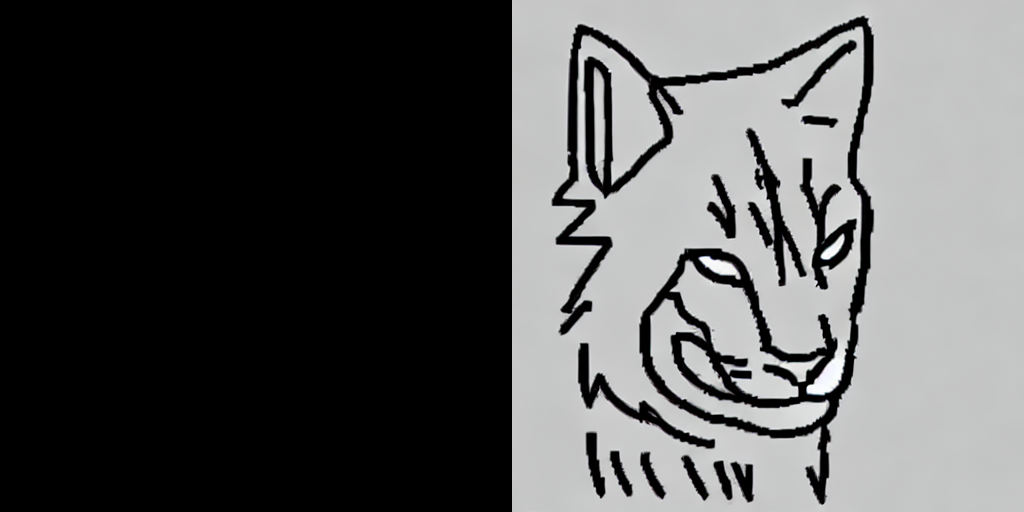

In [15]:
from torch import autocast
prompt = "a photo of a cat in the style of sks" #@param {type:"string"}

num_samples = 1 #@param {type:"number"}
num_rows = 2 #@param {type:"number"}

all_images = []
for _ in range(num_rows):
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

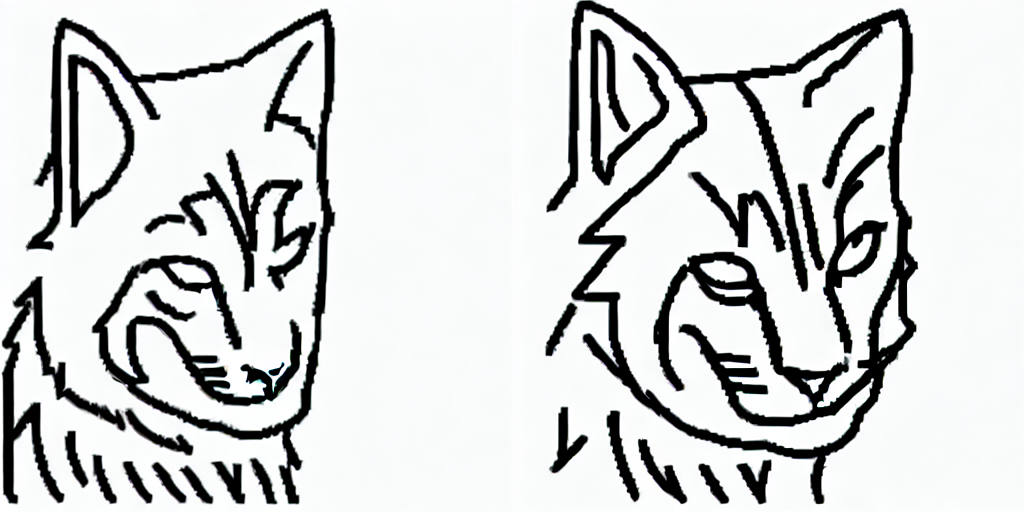

In [16]:
from torch import autocast
prompt = "a photo of a cat in the style of sks" #@param {type:"string"}

num_samples = 1 #@param {type:"number"}
num_rows = 2 #@param {type:"number"}

all_images = []
for _ in range(num_rows):
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

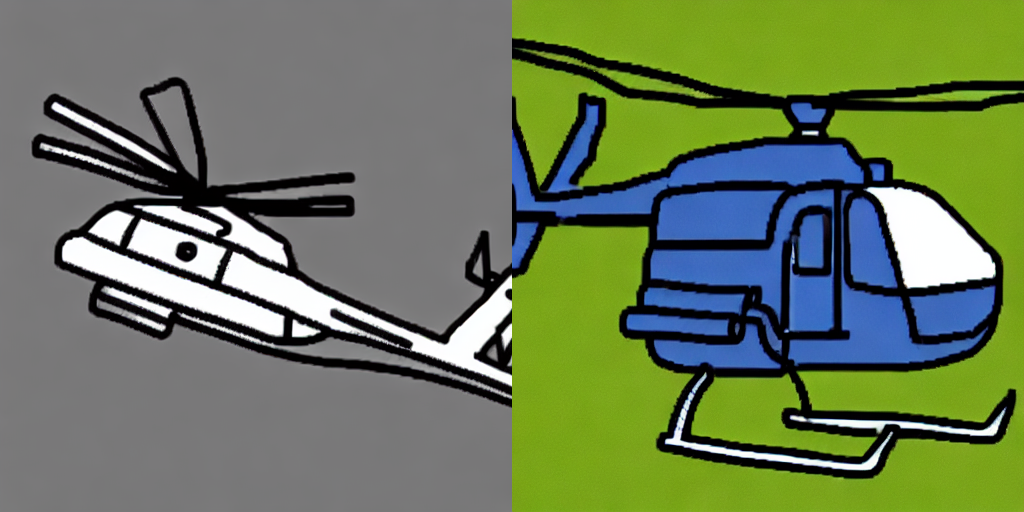

In [17]:
from torch import autocast
prompt = "a photo of an helicopter the style of sks" #@param {type:"string"}

num_samples = 1 #@param {type:"number"}
num_rows = 2 #@param {type:"number"}

all_images = []
for _ in range(num_rows):
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


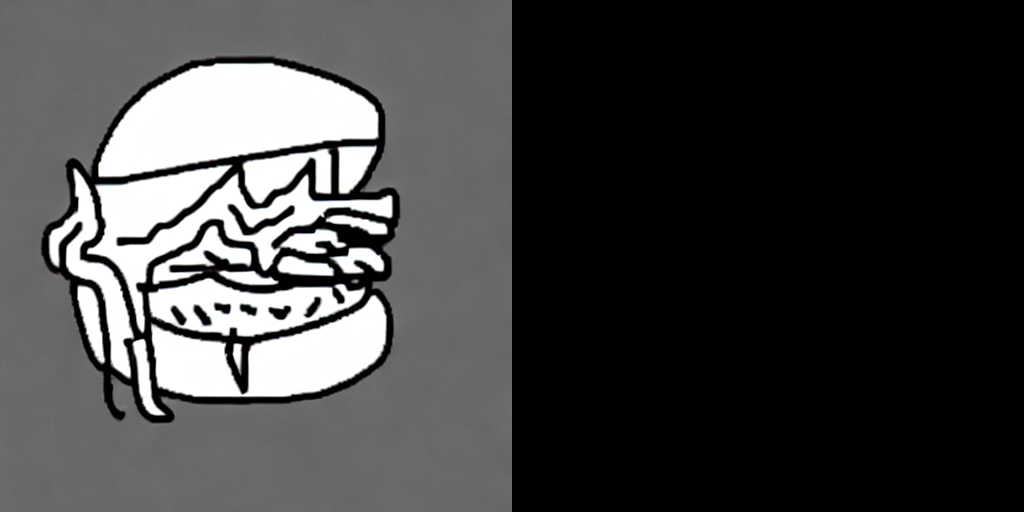

In [19]:
from torch import autocast
prompt = "a photo of a hamburger in the style of sks" #@param {type:"string"}

num_samples = 1 #@param {type:"number"}
num_rows = 2 #@param {type:"number"}

all_images = []
for _ in range(num_rows):
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/50 [00:00<?, ?it/s]

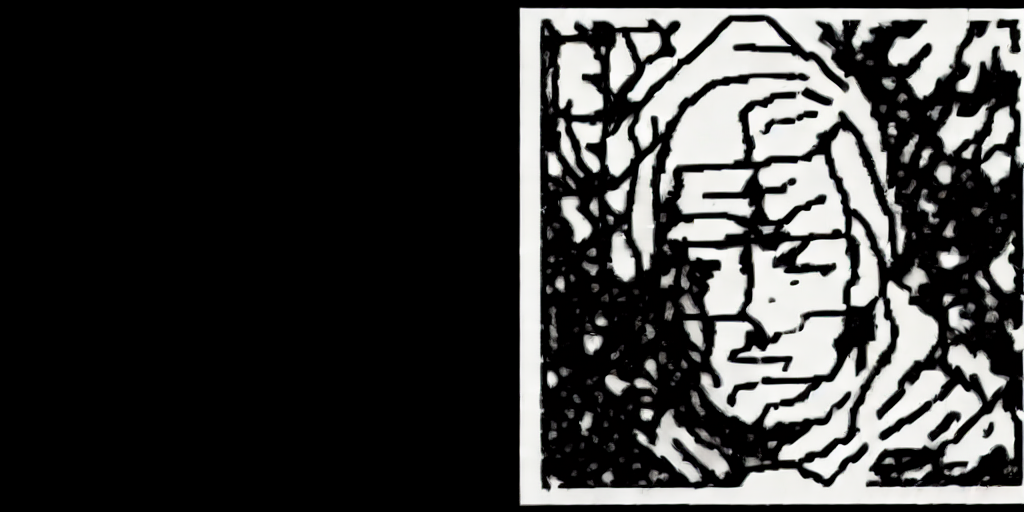

In [22]:
from torch import autocast
prompt = "a photo in the style of sks" #@param {type:"string"}

num_samples = 1 #@param {type:"number"}
num_rows = 2 #@param {type:"number"}

all_images = []
for _ in range(num_rows):
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

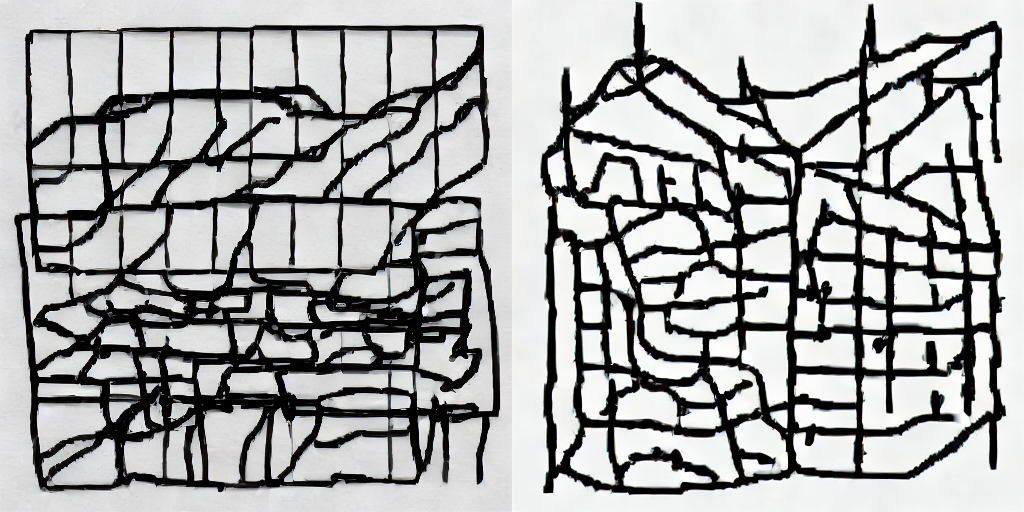

In [24]:
from torch import autocast
prompt = "sks" #@param {type:"string"}

num_samples = 1 #@param {type:"number"}
num_rows = 2 #@param {type:"number"}

all_images = []
for _ in range(num_rows):
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid